In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
from __init__ import *
from __init__jupyterlab import *

import snmcseq_utils

In [2]:
df_genes = pd.read_csv(PATH_GENEBODY_ANNOTATION, sep='\t')
df_genes['gid'] = df_genes['gene_id'].apply(lambda x: x.split('.')[0])
print(df_genes.shape)
df_genes.head()

(53379, 8)


,gene_id,gene_name,chr,start,end,strand,gene_type,gid
0,ENSMUSG00000102693.1,4933401J01Rik,chr1,3073253,3074322,+,TEC,ENSMUSG00000102693
1,ENSMUSG00000064842.1,Gm26206,chr1,3102016,3102125,+,snRNA,ENSMUSG00000064842
2,ENSMUSG00000051951.5,Xkr4,chr1,3205901,3671498,-,protein_coding,ENSMUSG00000051951
3,ENSMUSG00000102851.1,Gm18956,chr1,3252757,3253236,+,processed_pseudogene,ENSMUSG00000102851
4,ENSMUSG00000103377.1,Gm37180,chr1,3365731,3368549,-,TEC,ENSMUSG00000103377


In [3]:
f = '/cndd/fangming/CEMBA/data/for_mCT-Seq/mouse_ALM_2018-06-14_genes-rows.csv'
df_genes2 = pd.read_csv(f)
x = np.intersect1d(df_genes['gene_name'].values, 
               df_genes2['gene_symbol'].values, 
              )
print(df_genes2.shape)
print(len(x))

(45768, 5)
32324


In [7]:
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_formatted/10x_cells_v2_metadata.tsv'
df_clst = pd.read_csv(f, sep='\t')
print(len(df_clst['subclass_label'].unique()))
print(len(df_clst['cluster_label'].unique()))
print(df_clst.shape)
df_clst.head()

18
89
(122641, 8)


,cell,cluster_id,QC,cluster_label,subclass_label,class_label,cluster_color,size
0,AAACCTGAGGAGTCTG-1L8TX_171026_01_F03,9,1,Sncg Slc17a8,Sncg,GABAergic,#9440F3,293
1,ACCTTTAGTACAGCAG-1L8TX_171026_01_F03,9,673,Sncg Slc17a8,Sncg,GABAergic,#9440F3,293
2,ACGATACCACCCAGTG-1L8TX_171026_01_F03,9,724,Sncg Slc17a8,Sncg,GABAergic,#9440F3,293
3,ACGGGTCAGTGGGCTA-1L8TX_171026_01_F03,9,885,Sncg Slc17a8,Sncg,GABAergic,#9440F3,293
4,AGCAGCCCAGTTCATG-1L8TX_171026_01_F03,9,1205,Sncg Slc17a8,Sncg,GABAergic,#9440F3,293


In [8]:
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/10x_cells_v2_raw.npz'
fgene = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/10x_cells_v2_raw.gene'
fcell = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/10x_cells_v2_raw.cell'
gxc_mat = snmcseq_utils.load_gc_matrix(fgene, fcell, f)
gxc_mat.data.shape

(31053, 121440)

In [10]:
df_sum = pd.DataFrame(index=gxc_mat.gene)
for clst, df_sub in df_clst.groupby('subclass_label'):
    print(clst)
    cells = df_sub['cell'].values
    cells_idx = snmcseq_utils.get_index_from_array(gxc_mat.cell, cells)
    df_sum[clst] = np.ravel(gxc_mat.data.tocsc()[:, cells_idx].sum(axis=1))
    
df_sum2 = pd.DataFrame(index=gxc_mat.gene)
for clst, df_sub in df_clst.groupby('cluster_label'):
    print(clst)
    cells = df_sub['cell'].values
    cells_idx = snmcseq_utils.get_index_from_array(gxc_mat.cell, cells)
    df_sum2[clst] = np.ravel(gxc_mat.data.tocsc()[:, cells_idx].sum(axis=1))

Astro
Endo
L2/3 IT
L5 ET
L5 IT
L5/6 NP
L6 CT
L6 IT
L6 IT Car3
L6b
Lamp5
Macrophage
OPC
Oligo
Pvalb
Sncg
Sst
Vip
Astro Aqp4
Endo_1
Endo_2
Endo_3
L2/3 IT 
L5 ET_1
L5 ET_2
L5 ET_3
L5 IT Rspo1_1
L5 IT Rspo2_1
L5 IT S100b
L5 IT Tcap_1
L5 IT Tcap_2
L5 NP Slc17a8
L5 NP Trh
L6 CT Cpa6
L6 CT Gpr139
L6 CT Nxph2 Kit
L6 CT Nxph2 Pou3f2
L6 IT Car3
L6 IT_1
L6 IT_2
L6 NP CT
L6 NP Trh_1
L6 NP Trh_2
L6b Kcnip1_1
L6b Kcnip1_2
L6b Ror1
L6b Shisa6_1
L6b Shisa6_2_1
L6b Shisa6_2_2
Lamp5 Egln3_1
Lamp5 Egln3_2
Lamp5 Egln3_3
Lamp5 Lhx6
Lamp5 Pax6
Lamp5 Pdlim5
Lamp5 Slc35d3
Macrophage
OPC Pdgfra
Oligo Enpp6_1
Oligo Enpp6_2
Oligo Opalin_1
Oligo Opalin_2
Pvalb Calb1_1
Pvalb Calb1_2
Pvalb Gabrg1
Pvalb Gpr149
Pvalb Il1rapl2
Pvalb Reln
Pvalb Sst Calb1_1
Pvalb Sst Calb1_2
Pvalb Vipr2
Sncg Calb1_1
Sncg Calb1_2
Sncg Col14a1
Sncg Npy2r
Sncg Slc17a8
Sst C1ql3_1
Sst C1ql3_2
Sst C1ql3_3
Sst Calb2
Sst Chodl
Sst Crhr2_1
Sst Crhr2_2
Sst Hspe_1
Sst Hspe_2
Sst Hspe_3
Sst Hspe_4
Sst Myh8_1
Sst Myh8_2
Sst Myh8_3
Sst Myh8_4
Sst Pv

In [11]:
import mygene
mg = mygene.MyGeneInfo()
out = mg.querymany(gxc_mat.gene, scopes='ensemblgene', fields='entrezgene', species='mouse')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-31053...done.
Finished.
1 input query terms found dup hits:
	[('ENSMUSG00000078899', 2)]
332 input query ter

In [12]:
entrez_ids = []
ensembl_ids = []
for _dict in out:
    ensembl_ids.append(_dict['query'])
    if 'entrezgene' in _dict.keys():
        entrez_ids.append(_dict['entrezgene'])
    else:
        entrez_ids.append(np.nan)
        
match_table = pd.DataFrame()
match_table['entrez'] = entrez_ids
match_table['ensembl'] = ensembl_ids
match_table = match_table.groupby('ensembl').first()
print(match_table.shape)
match_table.head()

(31053, 1)


,entrez
ensembl,
ENSMUSG00000000001,14679
ENSMUSG00000000003,54192
ENSMUSG00000000028,12544
ENSMUSG00000000031,NaN
ENSMUSG00000000037,107815


In [14]:
df_sum_reform = df_sum.copy()
df_sum_reform.index = match_table.reindex(df_sum_reform.index)['entrez'].values
print(df_sum_reform.shape)

df_sum_reform = df_sum_reform.reset_index().dropna().set_index('index')
print(df_sum_reform.shape)
df_sum_reform.head()


(31053, 18)
(20923, 18)


,Astro,Endo,L2/3 IT,L5 ET,L5 IT,L5/6 NP,L6 CT,L6 IT,L6 IT Car3,L6b,Lamp5,Macrophage,OPC,Oligo,Pvalb,Sncg,Sst,Vip
index,,,,,,,,,,,,,,,,,,
497097,11880,3807,300213,13905,1151469,111186,620487,256203,17442,63099,163917,2808,3321,10611,134352,36504,191889,218214
19888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_sum2_reform = df_sum2.copy()
df_sum2_reform.index = match_table.reindex(df_sum2_reform.index)['entrez'].values
print(df_sum2_reform.shape)

df_sum2_reform = df_sum2_reform.reset_index().dropna().set_index('index')
print(df_sum2_reform.shape)
df_sum2_reform.head()

(31053, 89)
(20923, 89)


,Astro Aqp4,Endo_1,Endo_2,Endo_3,L2/3 IT,L5 ET_1,L5 ET_2,L5 ET_3,L5 IT Rspo1_1,L5 IT Rspo2_1,...,Vip Chat,Vip Crispld2,Vip Gpc3,Vip Htr1f_1,Vip Htr1f_2,Vip Igfbp6,Vip Lypd1,Vip Mybpc1,Vip Serpinf1_1,Vip Serpinf1_2
index,,,,,,,,,,,,,,,,,,,,,
497097,11880,2160,675,972,300213,7317,3780,2808,627804,258633,...,37854,33669,24381,22896,5454,25569,12474,15390,5076,9396
19888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_18_cluster_counts.tsv'
df_sum_reform.to_csv(f, sep="\t", index=True, header=True)

f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_89_cluster_counts.tsv'
df_sum2_reform.to_csv(f, sep="\t", index=True, header=True)

In [ ]:
# df_sum_reform_level1 = df_sum_reform
clusters = df_sum_reform.columns.values
clusters_to_level1 = {clst: clst.split('-')[0] for clst in clusters}
print(clusters, clusters_to_level1)

In [79]:
df_sum_level1 = pd.DataFrame(index=df_sum_reform.index)
for clst in clusters:
    clst_lv1 = clusters_to_level1[clst]
    if clst_lv1 not in df_sum_level1.columns.values:
        df_sum_level1[clst_lv1] = 0
    df_sum_level1[clst_lv1] += df_sum_reform[clst] 
    
print(df_sum_level1.shape)
df_sum_level1.head()

(20923, 10)


,1,10,2,3,4,5,6,7,8,9
index,,,,,,,,,,
497097,2139461,17852,1585364,1437614,1560822,854115,652728,276294,117225,72645
19888,344,5,245,233,120,204,148,36,34,7
20671,1,0,5,13,4,4,2,1,0,0
27395,9252,119,6690,7406,4173,4938,3730,863,777,366
18777,23,1,22,16,8,9,3,0,1,0


In [66]:
# gene_names = df_genes.set_index('gid').reindex(df_sum.index.values)['gene_name'].values
# print(len(gene_names), 
#       len(set(gene_names))
#      )
# df_sum['gene_name'] = gene_names
# df_sum = df_sum.dropna().groupby('gene_name').sum()
# print(df_sum.shape)
# df_sum.head()

In [65]:
df_summary = (df_clst[df_clst['modality']=='10x_cells_v2'].groupby('joint_cluster_round3')
                                            .agg({'joint_cluster_round3_annot': 'first', 
                                             'modality': 'count',
                                            })
                )
print(df_summary.shape)
df_summary = (df_summary.reset_index()
                        .rename(columns={
                            'modality': 'num_cells',
                            'joint_cluster_round3': 'cluster',
                            'joint_cluster_round3_annot': 'annotation',
                        })
    )
df_summary.head()

(56, 2)


,cluster,annotation,num_cells
0,1-1-1,L5 IT Rspo1_1,22021
1,1-2-1,L5 IT Rspo2_1,10574
2,1-2-2,L5 IT Tcap_1,1239
3,10-1-1,Sst Chodl,352
4,2-1-1,L6 CT Cpa6,6008


In [48]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_clusters.tsv'
df_summary.to_csv(f, sep="\t", index=False, header=True)


In [80]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_cluster_counts.tsv'
df_sum_reform.to_csv(f, sep="\t", index=True, header=True)

In [81]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_cluster_counts_level1.tsv'
df_sum_level1.to_csv(f, sep="\t", index=True, header=True)

In [8]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/10x_v2_cluster_counts_gid.tsv'
df_sum.to_csv(f, sep="\t", index=True, header=True)

In [7]:
print(df_sum.shape)
df_sum.head()

(31053, 56)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-2-3,2-2-4,...,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,8-3-2,9-1-1,9-2-1,9-2-2
ENSMUSG00000051951,1459727,615259,64475,17852,387066,359025,627440,22186,10334,1940,...,78387,52060,34727,27376,50214,3591,1317,47597,13856,11192
ENSMUSG00000089699,3188,2484,513,168,1246,1008,2670,142,50,13,...,162,158,204,158,365,14,8,34,14,7
ENSMUSG00000102343,71,30,3,2,20,9,39,3,1,0,...,2,3,1,1,3,0,0,0,4,2
ENSMUSG00000025900,173,139,32,5,48,45,130,2,4,0,...,6,3,10,10,12,2,0,2,3,2
ENSMUSG00000025902,1,0,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### tree 

In [9]:
df_features = snmcseq_utils.logcpm(df_sum)
print(df_features.shape)
df_features.head()

(31053, 56)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-2-3,2-2-4,...,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,8-3-2,9-1-1,9-2-1,9-2-2
ENSMUSG00000051951,3.198674,3.159760,3.091669,3.196410,3.207329,3.208330,3.181796,3.144709,3.122438,3.035540,...,3.255709,3.246329,3.183939,3.142269,3.150259,3.116045,3.112409,3.204568,3.146370,3.165548
ENSMUSG00000089699,0.648226,0.834322,1.034166,1.198184,0.791376,0.742970,0.872927,0.996730,0.869778,0.917283,...,0.674096,0.802674,0.998538,0.954378,1.051786,0.784540,0.947571,0.331102,0.382796,0.282179
ENSMUSG00000102343,0.032137,0.029543,0.024247,0.070402,0.034723,0.017231,0.039179,0.075020,0.052381,0.000000,...,0.019510,0.042006,0.018681,0.021458,0.035182,0.000000,0.000000,0.000000,0.147396,0.100867
ENSMUSG00000025900,0.074503,0.122592,0.207488,0.158352,0.079096,0.080039,0.118823,0.051424,0.179766,0.000000,...,0.056081,0.042006,0.158220,0.177971,0.126302,0.237289,0.000000,0.028270,0.114968,0.100867
ENSMUSG00000025902,0.000470,0.000000,0.000000,0.000000,0.000000,0.007743,0.001050,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Build a tree separately for each cluster

In [17]:
import fbpca
import scipy.cluster.hierarchy as sch

In [27]:
df_annot = df_clst.groupby('joint_cluster_round3').first()['joint_cluster_round3_annot']
df_annot.head()

joint_cluster_round3
1-1-1     L5 IT Rspo1_1
1-2-1     L5 IT Rspo2_1
1-2-2      L5 IT Tcap_1
10-1-1        Sst Chodl
2-1-1        L6 CT Cpa6
Name: joint_cluster_round3_annot, dtype: object

In [41]:
for clst_level1 in clsts_level1:
    f = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/dendrogram_C{}_191116.pdf'.format(clst_level1)
    fz = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/Z_C{}_191116.npy'.format(clst_level1)
    forder = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/Zorder_C{}_191116.npy'.format(clst_level1)
    Z = np.load(fz)
    forder = np.load(forder)
    print(Z, forder)
    break

[[  0.           1.          14.96663726   2.        ]
 [  2.           3.          17.53700183   3.        ]] ['1-1-1' '1-2-1' '1-2-2']


1


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


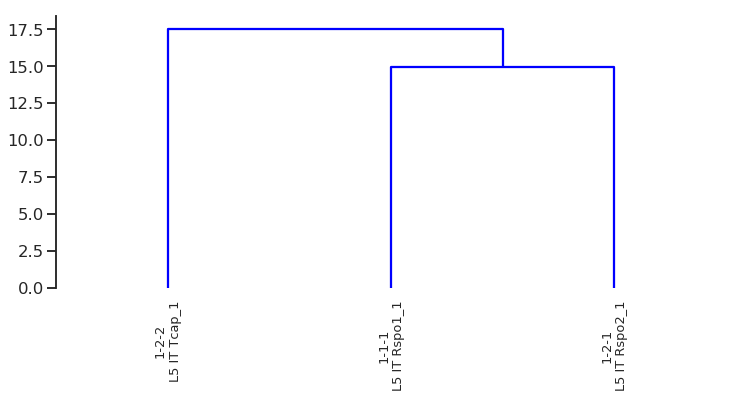

10
2


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


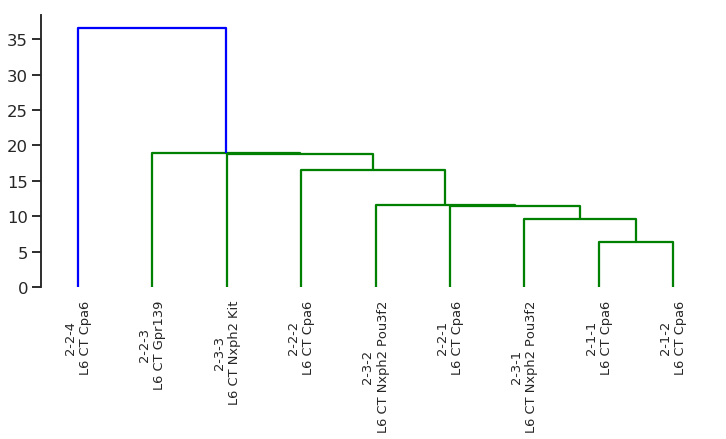

3


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


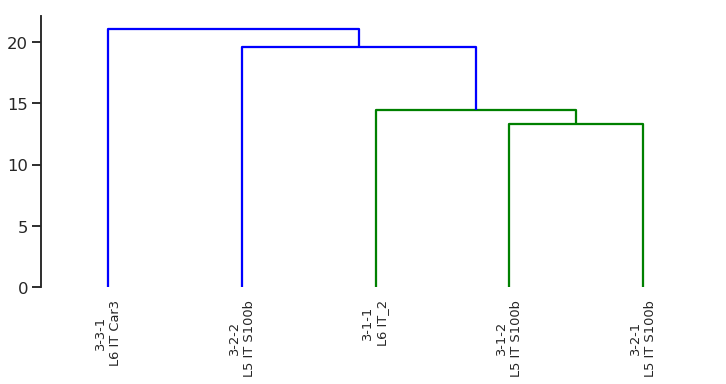

4


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


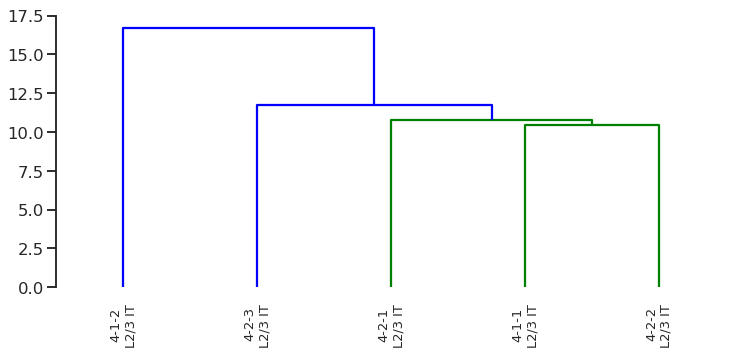

5


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


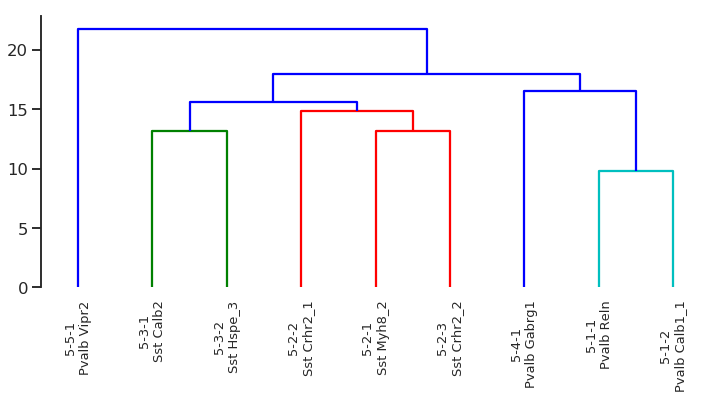

6


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


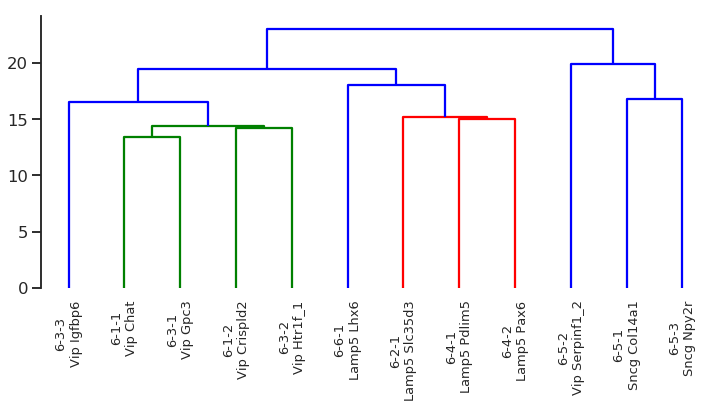

7


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


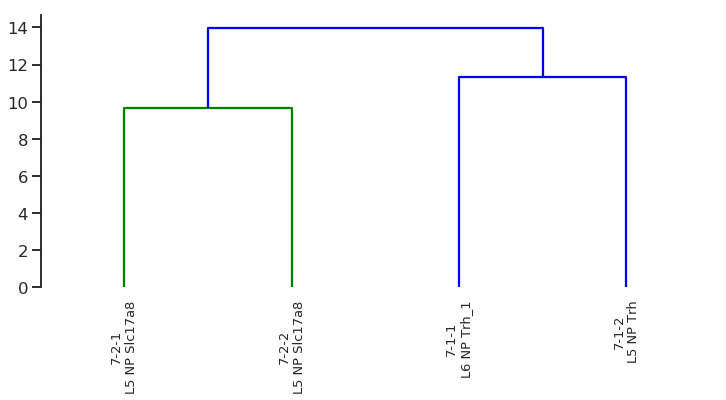

8


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


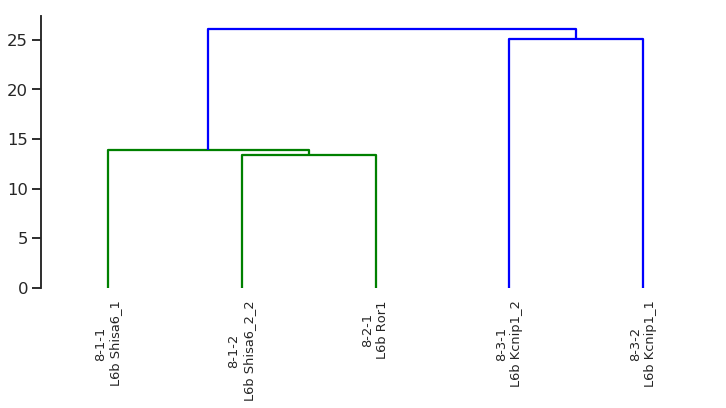

9


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


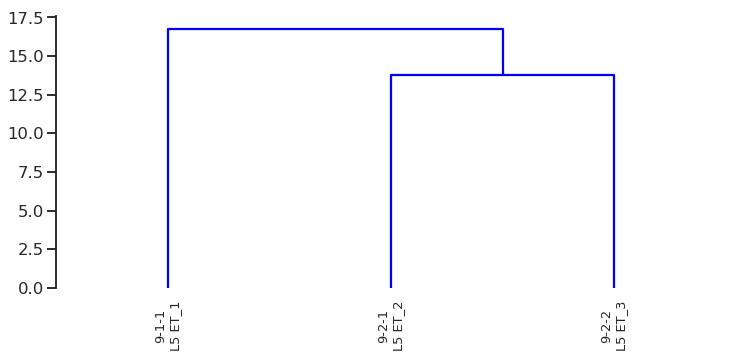

In [40]:
clsts_level1 = np.unique([clst.split('-')[0] 
                           for clst in df_clst['joint_cluster_round2'].unique()]
                         )
clsts_level1
for clst_level1 in clsts_level1:
    f = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/dendrogram_C{}_191116.pdf'.format(clst_level1)
    fz = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/Z_C{}_191116.npy'.format(clst_level1)
    forder = '/cndd/fangming/CEMBA/data/MOp_all/results/figures/dendrogram/Zorder_C{}_191116.npy'.format(clst_level1)
    
    print(clst_level1)
    df_features_level1 = df_features.filter(regex="^{}-".format(clst_level1), axis=1)
    if df_features_level1.shape[1] > 1:
        Z = sch.linkage(df_features_level1.T.values)
        clusters = df_features_level1.columns.values
        np.save(fz, Z)
        np.save(forder, clusters)

        fig, ax = plt.subplots(figsize=(12, 5))
        g = sch.dendrogram(Z, ax=ax)
        ax.grid('off')
        ax.set_xticklabels(['{}\n{}'.format(clusters[lv], df_annot.loc[clusters[lv]]) 
                            for lv in g['leaves']], fontsize=13, rotation=90)
        sns.despine(top=True, bottom=True, right=True, ax=ax)
        fig.savefig(f, bbox_inches='tight')
        plt.show()

In [92]:

U, s, Vt = fbpca.pca(df_features.T.values, k=30)
pcs = U.dot(np.diag(s))
print(pcs.shape)

(56, 30)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


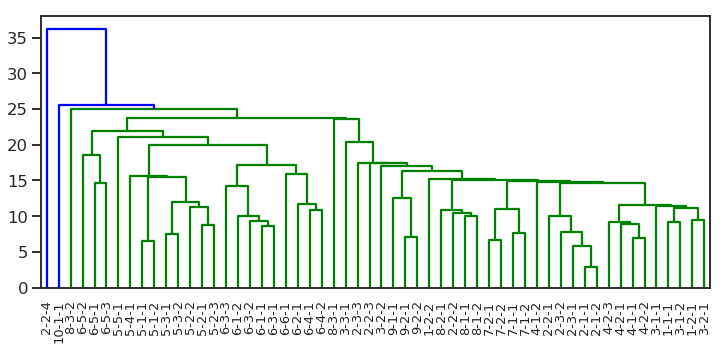

In [114]:
Z = sch.linkage(pcs)

fig, ax = plt.subplots(figsize=(12, 5))
g = sch.dendrogram(Z, ax=ax)
ax.grid('off')
ax.set_xticklabels([clusters[lv] for lv in g['leaves']], fontsize=13)
plt.show()

/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


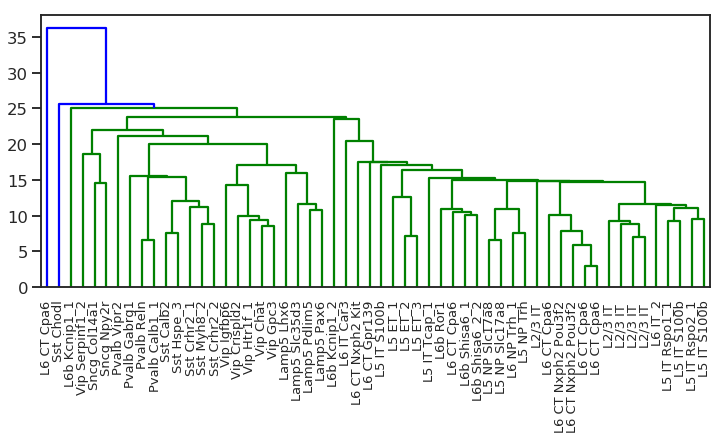

In [115]:
annots = df_summary.set_index('cluster').loc[[clusters[lv] for lv in g['leaves']], 'annotation'].values

fig, ax = plt.subplots(figsize=(12, 5))
g = sch.dendrogram(Z, ax=ax)
ax.grid('off')
ax.set_xticklabels(annots, fontsize=13)
plt.show()